0.03340658004919969


(([], []), ([], []))

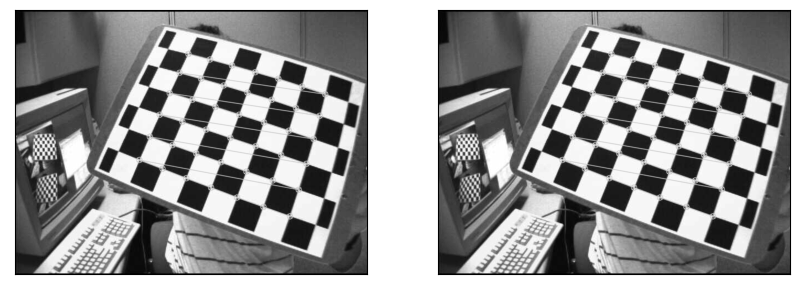

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('left03.jpg', cv.IMREAD_GRAYSCALE)

camera = np.load('camera.npz')

mtx = camera['mtx']
dist = camera['dist']

ret, corners = cv.findChessboardCorners(img, (7,6), None)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
corners = cv.cornerSubPix(img, corners, (11,11), (-1,-1), criteria)

chess_points = np.zeros((6*7,3), np.float32)
chess_points[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

_, _, _, rvecs, tvecs = cv.calibrateCamera([chess_points], [corners], img.shape, mtx, dist)

imgpoints, _ = cv.projectPoints(chess_points, rvecs[0], tvecs[0], mtx, dist)

error = cv.norm(corners, imgpoints, cv.NORM_L2) / len(imgpoints)

print(error)

res1 = img.copy()
cv.drawChessboardCorners(res1, (7,6), corners, True)

res2 = img.copy()
cv.drawChessboardCorners(res2, (7,6), imgpoints, True)

plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(res1, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2), plt.imshow(res2, cmap='gray')
plt.xticks([]), plt.yticks([])
